In [1]:
# notebook to illustrate text indexing and basic search

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*")

content_directory =  data_sets/iraq_inquiry/txt/
text_filename_pattern =  the-report*.txt
self.documents populated =  58


In [5]:
# first clear index
tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass

# merge document indices into a corpus index
tmt.index_search.merge_wordcount_indices_for_corpus(cr.content_directory)

removed wordcount index file:  data_sets/iraq_inquiry/txt/index.wordcount
removed relevance index file:  data_sets/iraq_inquiry/txt/index.relevance
processing  the-report-of-the-iraq-inquiry_executive-summary.txt


processing  the-report-of-the-iraq-inquiry_introduction.txt


processing  the-report-of-the-iraq-inquiry_section-101.txt


processing  the-report-of-the-iraq-inquiry_section-102.txt


processing  the-report-of-the-iraq-inquiry_section-103.txt


processing  the-report-of-the-iraq-inquiry_section-104.txt


processing  the-report-of-the-iraq-inquiry_section-11.txt


processing  the-report-of-the-iraq-inquiry_section-111.txt


processing  the-report-of-the-iraq-inquiry_section-112.txt
processing  the-report-of-the-iraq-inquiry_section-12.txt


processing  the-report-of-the-iraq-inquiry_section-121.txt


processing  the-report-of-the-iraq-inquiry_section-122.txt


processing  the-report-of-the-iraq-inquiry_section-131.txt


processing  the-report-of-the-iraq-inquiry_section-132.txt


processing  the-report-of-the-iraq-inquiry_section-141.txt


processing  the-report-of-the-iraq-inquiry_section-142.txt


processing  the-report-of-the-iraq-inquiry_section-15-1.txt


processing  the-report-of-the-iraq-inquiry_section-152.txt


processing  the-report-of-the-iraq-inquiry_section-161.txt


processing  the-report-of-the-iraq-inquiry_section-162.txt


processing  the-report-of-the-iraq-inquiry_section-163.txt


processing  the-report-of-the-iraq-inquiry_section-164.txt


processing  the-report-of-the-iraq-inquiry_section-170.txt


processing  the-report-of-the-iraq-inquiry_section-20.txt


processing  the-report-of-the-iraq-inquiry_section-31.txt


processing  the-report-of-the-iraq-inquiry_section-32.txt


processing  the-report-of-the-iraq-inquiry_section-33.txt


processing  the-report-of-the-iraq-inquiry_section-34.txt


processing  the-report-of-the-iraq-inquiry_section-35.txt


processing  the-report-of-the-iraq-inquiry_section-36.txt


processing  the-report-of-the-iraq-inquiry_section-37.txt


processing  the-report-of-the-iraq-inquiry_section-38.txt


processing  the-report-of-the-iraq-inquiry_section-40.txt


processing  the-report-of-the-iraq-inquiry_section-41.txt


processing  the-report-of-the-iraq-inquiry_section-42.txt


processing  the-report-of-the-iraq-inquiry_section-43.txt


processing  the-report-of-the-iraq-inquiry_section-44.txt


processing  the-report-of-the-iraq-inquiry_section-50.txt


processing  the-report-of-the-iraq-inquiry_section-61.txt


processing  the-report-of-the-iraq-inquiry_section-62.txt


processing  the-report-of-the-iraq-inquiry_section-63.txt


processing  the-report-of-the-iraq-inquiry_section-64.txt


processing  the-report-of-the-iraq-inquiry_section-65.txt


processing  the-report-of-the-iraq-inquiry_section-70.txt


processing  the-report-of-the-iraq-inquiry_section-80.txt


processing  the-report-of-the-iraq-inquiry_section-91.txt


processing  the-report-of-the-iraq-inquiry_section-92.txt


processing  the-report-of-the-iraq-inquiry_section-93.txt


processing  the-report-of-the-iraq-inquiry_section-94.txt


processing  the-report-of-the-iraq-inquiry_section-95.txt


processing  the-report-of-the-iraq-inquiry_section-96.txt


processing  the-report-of-the-iraq-inquiry_section-97.txt


processing  the-report-of-the-iraq-inquiry_section-98.txt


processing  the-report-of-the-iraq-inquiry_section_annex-1.txt


processing  the-report-of-the-iraq-inquiry_section_annex-2.txt


processing  the-report-of-the-iraq-inquiry_section_annex-3.txt


processing  the-report-of-the-iraq-inquiry_section_annex-4.txt
processing  the-report-of-the-iraq-inquiry_section_annex-5.txt


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_executive-summary.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_introduction.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-101.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-102.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-103.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-104.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-11.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-111.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-112.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-12.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-121.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-122.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-131.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-132.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-141.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-142.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-15-1.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-152.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-161.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-162.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-163.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-164.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-170.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-20.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-31.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-32.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-33.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-34.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-35.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-36.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-37.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-38.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-40.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-41.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-42.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-43.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-44.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-50.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-61.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-62.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-63.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-64.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-65.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-70.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-80.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-91.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-92.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-93.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-94.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-95.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-96.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-97.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section-98.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section_annex-1.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section_annex-2.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section_annex-3.txt_index.wordcount
merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section_annex-4.txt_index.wordcount


merging index file ..  data_sets/iraq_inquiry/txt/the-report-of-the-iraq-inquiry_section_annex-5.txt_index.wordcount
saving corpus index ...  data_sets/iraq_inquiry/txt/index.wordcount


In [6]:
# create relevance index
tmt.index_search.calculate_relevance_index(cr.content_directory)

In [7]:
tmt.index_search.print_index(cr.content_directory)

wordcount_index_file  data_sets/iraq_inquiry/txt/index.wordcount
        the-report-of-the-iraq-inquiry_executive-summary.txt  \
                                                    154.0      
0                                                     0.0      
0000                                                  0.0      
000s                                                  0.0      
00103                                                 0.0      
006                                                   0.0      
01                                                    0.0      
0100                                                  0.0      
010109                                                0.0      
015                                                   0.0      

        the-report-of-the-iraq-inquiry_introduction.txt  \
                                                   18.0   
0                                                   0.0   
0000                                                0

In [8]:
tmt.index_search.search_index(cr.content_directory, "rice")

matching_documents the-report-of-the-iraq-inquiry_executive-summary.txt    0.000023
the-report-of-the-iraq-inquiry_section-101.txt          0.000093
the-report-of-the-iraq-inquiry_section-102.txt          0.000038
the-report-of-the-iraq-inquiry_section-103.txt          0.000081
the-report-of-the-iraq-inquiry_section-11.txt           0.000007
the-report-of-the-iraq-inquiry_section-111.txt          0.000080
the-report-of-the-iraq-inquiry_section-12.txt           0.000077
the-report-of-the-iraq-inquiry_section-121.txt          0.000022
the-report-of-the-iraq-inquiry_section-122.txt          0.000053
the-report-of-the-iraq-inquiry_section-15-1.txt         0.000003
the-report-of-the-iraq-inquiry_section-31.txt           0.000159
the-report-of-the-iraq-inquiry_section-32.txt           0.000081
the-report-of-the-iraq-inquiry_section-33.txt           0.000099
the-report-of-the-iraq-inquiry_section-34.txt           0.000353
the-report-of-the-iraq-inquiry_section-35.txt           0.000146
the-re

[('the-report-of-the-iraq-inquiry_section-35.txt', 0.00014565737579680409),
 ('the-report-of-the-iraq-inquiry_section-70.txt', 3.5844518296875156e-05),
 ('the-report-of-the-iraq-inquiry_section-44.txt', 0.00011118502842958585),
 ('the-report-of-the-iraq-inquiry_section-11.txt', 6.6670485962034873e-06),
 ('the-report-of-the-iraq-inquiry_section-102.txt', 3.8414556656886779e-05),
 ('the-report-of-the-iraq-inquiry_section-65.txt', 8.4690310905961285e-05),
 ('the-report-of-the-iraq-inquiry_section-62.txt', 2.886725348337131e-05),
 ('the-report-of-the-iraq-inquiry_section-43.txt', 1.3015994215083829e-05),
 ('the-report-of-the-iraq-inquiry_section-80.txt', 6.9629730186628088e-05),
 ('the-report-of-the-iraq-inquiry_section-94.txt', 0.00016864291732531655),
 ('the-report-of-the-iraq-inquiry_section-122.txt', 5.3097859204127683e-05),
 ('the-report-of-the-iraq-inquiry_section-42.txt', 6.6017849850018577e-06),
 ('the-report-of-the-iraq-inquiry_section-15-1.txt', 3.3927482745542951e-06),
 ('the-re

In [9]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance.most_common(20)

[('multinational', 0.023754033306571325),
 ('that', 0.022069696800350622),
 ('de‑ba’athification', 0.021256749312735676),
 ('basra', 0.020525443965980751),
 ('resolution', 0.019284730269020257),
 ('map', 0.016688958427410291),
 ('had', 0.01301235935317196),
 ('baghdad', 0.012478507209324426),
 ('president', 0.012145017300826828),
 ('inspectors', 0.01188347398833396),
 ('2002', 0.011836208683611625),
 ('would', 0.011667650300699698),
 ('mndse', 0.011605692952290187),
 ('saddam', 0.011273884484010267),
 ('reconstruction', 0.011208814362888979),
 ('dfid', 0.011011950087901899),
 ('witness', 0.01098821983097715),
 ('police', 0.010928677112431645),
 ('intelligence', 0.010676266535784682),
 ('weapons', 0.010667810590910803)]

In [10]:
# 20 least common
words_by_relevance.most_common()[:-20-1:-1]

[('the', 0.0),
 ('for', 0.0),
 ('report', 0.0),
 ('of', 0.0),
 ('from', 0.0),
 ('in', 0.0),
 ('iraq', 0.0),
 ('on', 0.0),
 ('to', 0.0),
 ('inquiry', 0.0),
 ('and', 0.0),
 ('a', 0.0),
 ('', 0.0),
 ('“6', 2.3976968001336311e-06),
 ('db', 2.3976968001336311e-06),
 ('mq', 2.3976968001336311e-06),
 ('mg', 2.3976968001336311e-06),
 ('fa', 3.3725454815286782e-06),
 ('‘7', 3.3725454815286782e-06),
 ('se’', 3.3890921050584702e-06)]

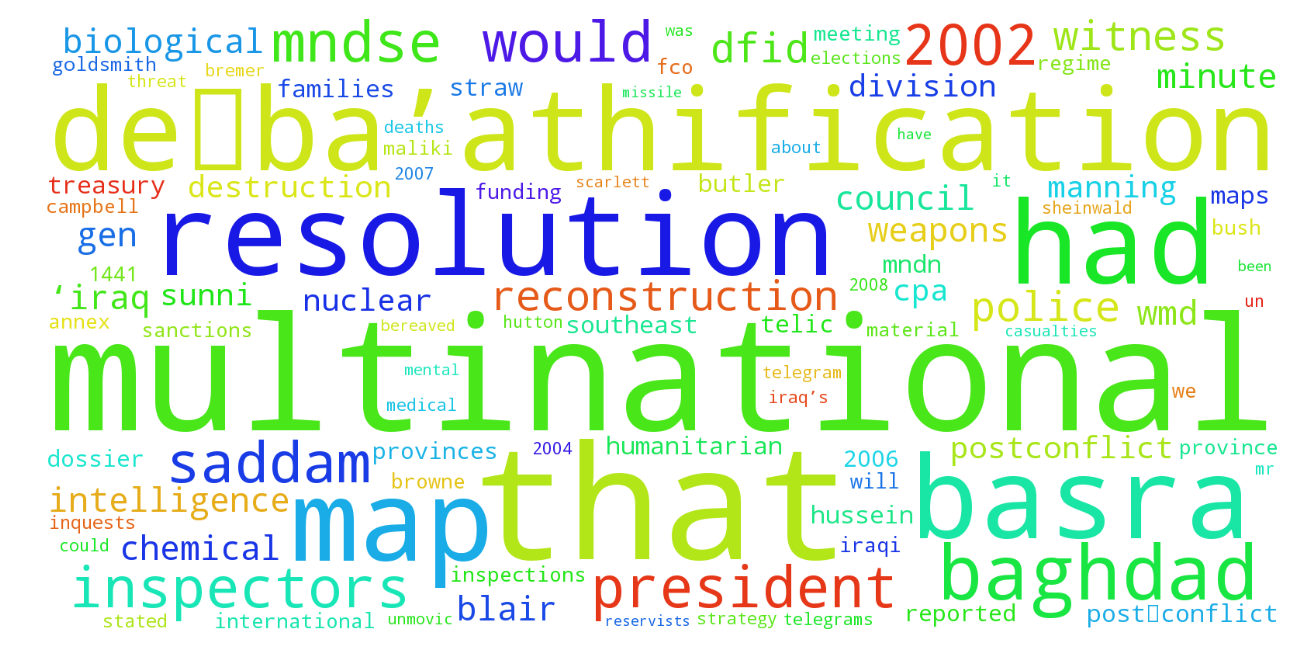

In [11]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)